### Latar Belakang
Manajemen Airbnb ingin meningkatkan kualitas dan kinerja listing properti di platform mereka dengan lebih efisien. Salah satu cara untuk melakukannya adalah dengan mengidentifikasi host yang paling mungkin berkomitmen untuk meningkatkan kinerja listing mereka dan mendukung mereka dengan sumber daya yang tepat. Host yang aktif, sering mendapat ulasan, dan menjaga ketersediaan tinggi cenderung lebih termotivasi untuk sukses di platform.

### Pernyataan Masalah
Manajemen Airbnb ingin mengetahui karakteristik host yang cenderung termotivasi untuk meningkatkan kinerja properti mereka, dibandingkan dengan host yang kurang aktif. Informasi ini akan memungkinkan Airbnb:

- Memfokuskan Sumber Daya Pelatihan: Memberikan pelatihan dan dukungan yang tepat kepada host yang berpotensi meningkatkan kinerja listing mereka.
- Mengurangi Biaya dan Waktu: Mengurangi biaya pendampingan host yang tidak aktif atau tidak termotivasi.
- Meningkatkan Kualitas Properti di Platform: Dengan mendukung host yang lebih aktif untuk mencapai kesuksesan lebih besar.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy import stats
import re
import unidecode
import datetime
import warnings
warnings.filterwarnings("ignore")

## Extrack file csv

In [69]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Dataset ini berisi informasi tentang daftar Airbnb di Bangkok. Berikut penjelasan dari setiap kolom dalam dataset ini:

`Unnamed: 0:` Kolom indeks yang tidak memiliki nama (kemungkinan merupakan hasil proses ekspor data yang secara otomatis memberikan nomor indeks).

`id`: ID unik untuk setiap listing (daftar properti) di Airbnb.

`name`: Nama atau deskripsi singkat dari properti yang disewakan.

`host_id`: ID unik dari host (pemilik atau penyedia properti).

`host_name`: Nama host yang menyediakan properti.

`neighbourhood`: Nama kawasan atau daerah di Bangkok tempat properti tersebut berada.

`latitude`: Koordinat geografis lintang (latitude) untuk lokasi properti.

`longitude`: Koordinat geografis bujur (longitude) untuk lokasi properti.

`room_type`: Jenis akomodasi yang ditawarkan, seperti "Entire home/apt" (seluruh rumah/apartemen), "Private room" (kamar pribadi), dan lain-lain.

`price`: Harga sewa per malam untuk properti tersebut (dalam mata uang setempat, kemungkinan Baht Thailand).

`minimum_night`s: Jumlah malam minimum yang harus dipesan oleh tamu.

`number_of_reviews`: Jumlah ulasan yang diterima properti tersebut.

`last_review`: Tanggal ulasan terakhir yang diterima oleh properti.

`reviews_per_month`: Rata-rata jumlah ulasan yang diterima per bulan.

`calculated_host_listings_count`: Jumlah total properti yang dikelola oleh host ini.

`availability_365`: Jumlah hari properti tersebut tersedia untuk disewa dalam setahun (365 hari).

`number_of_reviews_ltm`: Jumlah ulasan yang diterima properti tersebut dalam 12 bulan terakhir (ltm = last twelve months).

Dataset ini memberikan gambaran tentang properti Airbnb di Bangkok, termasuk detail lokasi, harga, ketersediaan, ulasan, dan informasi tentang host-nya.

## Data Understanding and Cleaning

In [70]:
# Statistik dasar untuk kolom numerik
summary_statistics = df.describe()

# Distribusi tipe kamar
room_type_distribution = df['room_type'].value_counts()

# Distribusi lokasi (neighbourhoods)
neighbourhood_distribution = df['neighbourhood'].value_counts().head(10)  # 10 Lokasi Teratas

# Distribusi harga
price_distribution = df['price'].describe()

# Display the outputs
display(summary_statistics, room_type_distribution, neighbourhood_distribution, price_distribution)


,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

neighbourhood
Vadhana         2153
Khlong Toei     2097
Huai Khwang     1125
Ratchathewi     1114
Bang Rak         827
Sathon           809
Phra Nakhon      619
Phra Khanong     558
Chatu Chak       548
Bang Na          458
Name: count, dtype: int64

count    1.585400e+04
mean     3.217704e+03
std      2.497212e+04
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64

1. Statistik Deskriptif untuk Kolom Numerik:
- Harga (price):
    - Rata-rata: 3.217 THB
    - Median: 1.429 THB
    - Harga minimum: 0 THB (mungkin anomali)
    - Harga maksimum: 1.100.000 THB (mungkin outlier atau properti premium)
    - 25% properti memiliki harga di bawah 900 THB, dan 75% di bawah 2.429 THB.
- Minimum nights (jumlah malam minimum):
    - Rata-rata: 15 malam (kemungkinan banyak listing dengan aturan long-stay).
    - 50% listing hanya memerlukan 1 malam minimum, sementara 75% membutuhkan hingga 7 malam.
- Jumlah ulasan:
    - Rata-rata jumlah ulasan: 16 ulasan
    - Median jumlah ulasan: 2 ulasan (banyak properti yang memiliki sedikit atau tidak ada ulasan).
    - Properti dengan ulasan maksimum: 1.224 ulasan.
- Ketersediaan (availability_365):
    - Rata-rata ketersediaan: 244 hari dalam setahun.

2. Distribusi Tipe Kamar:
- Entire home/apt (Seluruh rumah/apartemen): 8.912 listing (56.2%)
- Private room (Kamar pribadi): 5.770 listing (36.4%)
- Hotel room: 649 listing (4.1%)
- Shared room (Kamar bersama): 523 listing (3.3%)

Sebagian besar listing adalah rumah atau apartemen lengkap, disusul kamar pribadi, yang menunjukkan bahwa Airbnb di Bangkok banyak digunakan untuk menyewa seluruh properti.

3. Distribusi Neighbourhood (Top 10):
- Vadhana: 2.153 listing
- Khlong Toei: 2.097 listing
- Huai Khwang: 1.125 listing
- Ratchathewi: 1.114 listing
- Bang Rak: 827 listing
- Sathon: 809 listing
- Phra Nakhon: 619 listing
- Phra Khanong: 558 listing
- Chatu Chak: 548 listing
- Bang Na: 458 listing

Sebagian besar listing berada di area pusat kota dan wilayah bisnis utama di Bangkok.

4. Distribusi Harga:
- Harga bervariasi cukup lebar, dengan beberapa listing yang sangat mahal. Mayoritas harga berkisar antara 900 hingga 2.429 THB per malam.

Berdasarkan pemahaman ini, kita bisa fokus pada analysis lebih lanjut untuk pola harga, ketersediaan, dan performa wilayah.

## Cek tipe data

In [71]:
# Mengecek tipe data
df.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

Kolom last review berisi waktu terakhir di rivew tetapi tipe data nya adalah object, kita dapat mengganti tipe data pada kolom ini dengan date time untuk keperluan analisa.

In [72]:
# Convert the 'last_review' column to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Verify the data type change
df['last_review'].dtypes

dtype('<M8[ns]')

## Missing value

In [73]:
# Menghitung jumlah missing values
missing_values = df.isnull().sum()
missing_values_percentage = df.isna().sum()/df.shape[0]*100

display(missing_values, missing_values_percentage)

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

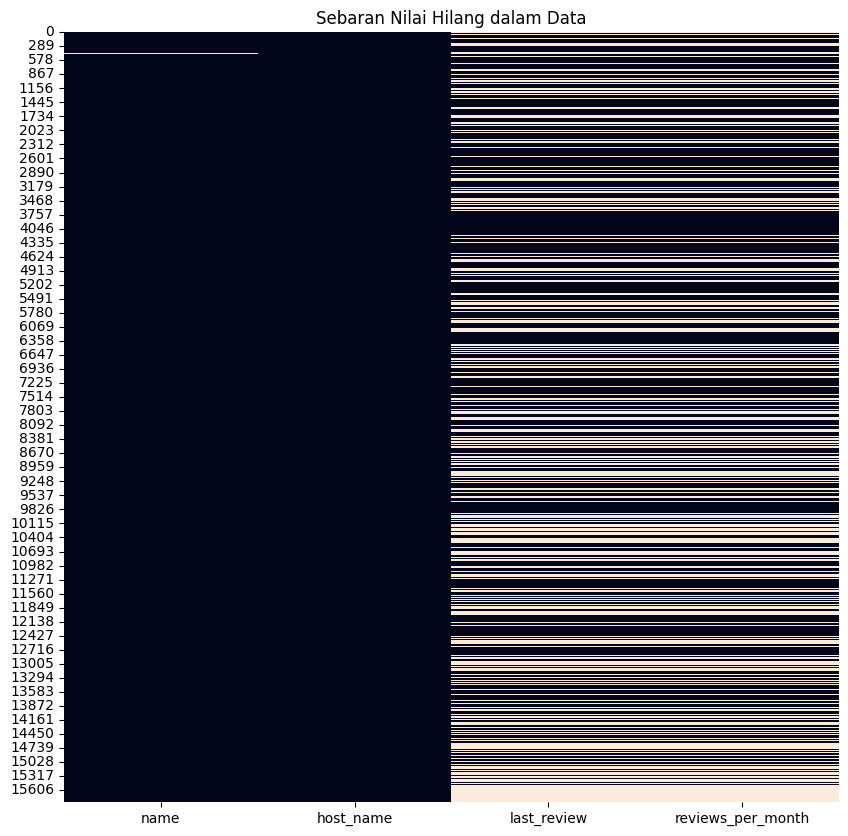

In [74]:
# Visualisasi sebaran missing values
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna(), cbar=False)
plt.title("Sebaran Nilai Hilang dalam Data")
plt.show()

Berdasarkan hasil pengecekan, berikut adalah beberapa hal yang perlu dibersihkan:

- Kolom name: Ada 8 baris dengan nilai kosong, kita dapat mengisinya dengan 'Unknown' karena kolom ini hanya berisi tentang deskripsi penginapan tersebut.
- Kolom host_name: Ada 1 baris dengan nilai kosong, kita dapat mengisinya dengan 'Unknown' karena kolom ini berisi nama dari host dan jika tidak ada maka nama dari pemilik properti terssebut tidak diketahui.
- Kolom last_review dan reviews_per_month: Ada 5.790 baris kosong. Ini bisa terjadi karena properti tersebut belum menerima ulasan.

Rencana Pembersihan:

- Isi nilai kosong di kolom name dengan "Unknown" (karena nama properti mungkin tidak selalu relevan).
- Ubah nilai kosong di kolom reviews_per_month menjadi 0.
- Mengisi missing value pada kolom last_review dengan nilai terlama agar tetap bisa di olah.

In [75]:
# Mengisi nilai hilang di kolom 'name' dan 'host_name'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

In [76]:
# Dapatkan tanggal terlama (terkecil) yang ada di kolom 'last_review'
oldest_date = df['last_review'].min()

# Mengisi missing values dengan tanggal terlama
df['last_review'].fillna(oldest_date, inplace=True)

In [77]:
# Mengisi nilai hilang di 'reviews_per_month' dengan 0
df['reviews_per_month'].fillna(0, inplace=True)

In [78]:
# Memeriksa nilai hilang setelah pembersihan
missing_values_after_cleaning = df.isnull().sum()

display(missing_values_after_cleaning, df.dtypes)

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Unnamed: 0                                 int64
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

### Kolom yang Bisa Dihapus (Tidak Relevan):
- `Unnamed: 0`: Kolom indeks yang tidak relevan untuk analysis.
- `id`: ID listing tidak memberikan insight tambahan.
- `host_id`: Tidak terlalu penting kecuali kita ingin menganalysis berdasarkan host secara individu.
- `host_name`: Sama seperti host_id, nama host tidak memberikan insight yang relevan untuk analysis tingkat properti secara keseluruhan.
- `latitude` & `longitude`: Kita tidak berencana melakukan analysis geografis berbasis peta, kedua kolom ini bisa dihapus dan hanya menggunakan neighbourhood untuk analysis lokasi.

In [79]:
# Drop kolom yang tidak relevan
df.drop(columns=['Unnamed: 0', 'id', 'host_id', 'host_name', 'latitude', 'longitude'], inplace=True)

Menangani outliers dan anomali (seperti harga properti '0') pada kolom price

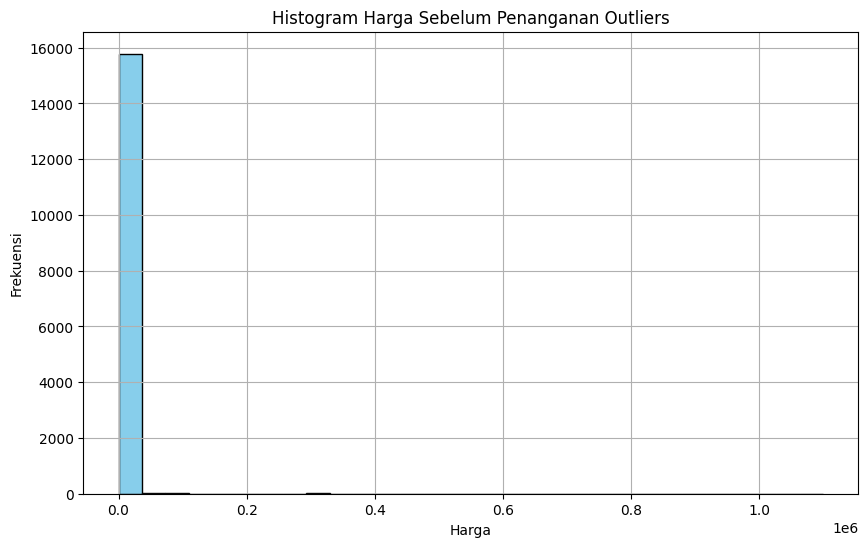

In [80]:
# Visualisasi histogram harga sebelum cleaning
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram Harga Sebelum Penanganan Outliers')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

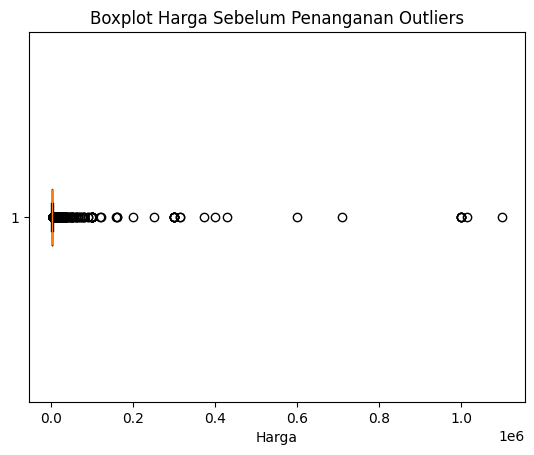

In [81]:
# Boxplot harga sebelum cleaning
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot Harga Sebelum Penanganan Outliers')
plt.xlabel('Harga')
plt.show()

Distribusi Data:
- Positively Skewed (Kemiringan Positif): Dari visualisasi di atas, terlihat bahwa sebagian besar data berada di rentang harga yang sangat rendah (di dekat 0), sementara hanya sedikit nilai price yang berada di rentang harga yang lebih tinggi. Ini adalah indikasi distribusi yang positively skewed, di mana sebagian besar data berada di satu ujung (harga rendah), sementara ada nilai yang lebih besar tetapi jauh lebih sedikit (harga tinggi).

- Rentang Harga Lebar: Sumbu X menunjukkan bahwa beberapa nilai harga mencapai lebih dari 1 juta. Ini menandakan bahwa ada properti yang sangat mahal di dataset, namun mereka sangat jarang.

- Mayoritas Harga di Rentang Kecil: Sebagian besar data tampak terkonsentrasi di rentang harga yang sangat kecil (dekat 0), yang menjelaskan tingginya bar pertama pada histogram. Ini dapat menunjukkan bahwa sebagian besar properti berada dalam kisaran harga rendah hingga menengah.

Melakukan metode IQR pada kolom `price`

In [82]:
# Menghapus harga bernilai 0 dan menangani outlier dengan metode IQR
df = df[df['price'] > 0]

# Handling outliers using IQR (Interquartile Range) method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers dari dataset
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Ringkasan harga setelah pembersihan
price_summary_cleaned = df['price'].describe()
display(price_summary_cleaned)

# Mengetahui jumlah baris
num_rows = len(df)
display(f"Jumlah baris: {num_rows}")

count    14450.000000
mean      1563.720761
std        942.560147
min        278.000000
25%        862.250000
50%       1300.000000
75%       2000.000000
max       4720.000000
Name: price, dtype: float64

'Jumlah baris: 14450'

Anomali pada kolom price telah berhasil ditangani. Setelah membersihkan nilai-nilai minimum 0 dan outlier menggunakan metode IQR, berikut adalah ringkasan statistik harga yang baru:

- Jumlah data: 14.450 listing
- Harga rata-rata: 1.563
- Harga minimum: 278
- Harga maksimum: 4.720
- Kuartil 1 (25%): 862
- Kuartil 2 (Median): 1.300
- Kuartil 3 (75%): 2.000

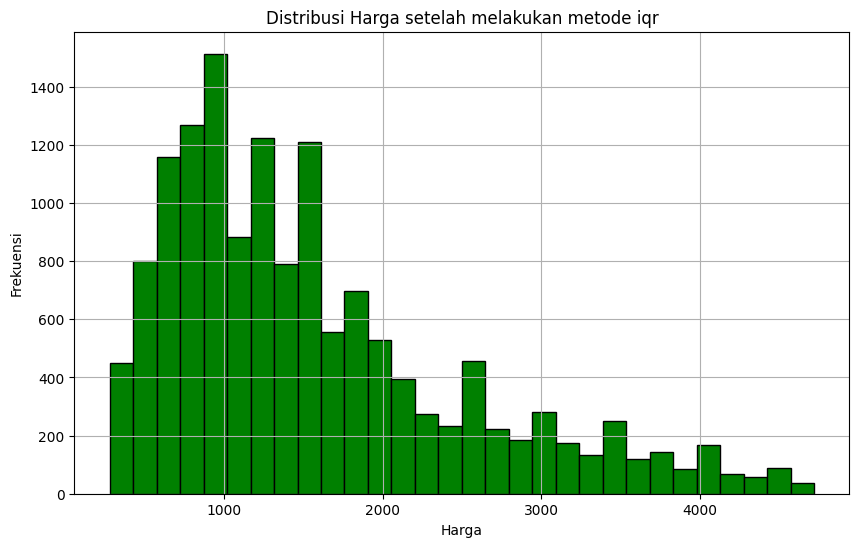

In [83]:
# Histogram harga setelah menangani outliers
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', color='green')
plt.title('Distribusi Harga setelah melakukan metode iqr')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

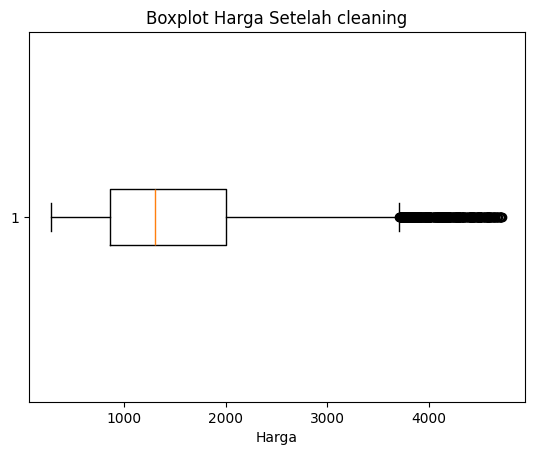

In [84]:
# Boxplot harga setelah cleaning
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot Harga Setelah cleaning')
plt.xlabel('Harga')
plt.show()

Uji statistik untuk mengetahui distribusi data di kolom `price` apakah normal atau tidak, setelah dilakukan metode IQR.

In [85]:
# Uji normalitas dengan Shapiro-Wilk
shapiro_test_stat, shapiro_p_value = stats.shapiro(df['price'])
print(f"Test Statistic: {shapiro_test_stat}, P-value: {shapiro_p_value}")

if shapiro_p_value<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 


Test Statistic: 0.8964471832264798, P-value: 1.2783904170005262e-70
tidak normal


Setelah dilakukan metode IQR dan transform, ternyata distribusi data di kolom price masih tidak normal, maka akan kita biarkan saja.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan.

In [86]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]); 

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(14450, 11)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,13473,[[长租特惠底价最短入住28天]市中心精品一居室/RAMA9/MRT/火车夜市/RCA酒吧街...
1,neighbourhood,object,0,50,"[Phra Khanong, Saphan Sung]"
2,room_type,object,0,4,"[Private room, Shared room]"
3,price,int64,0,2319,"[390, 517]"
4,minimum_nights,int64,0,83,"[370, 360]"
5,number_of_reviews,int64,0,294,"[79, 128]"
6,last_review,datetime64[ns],0,1611,"[2020-04-13T00:00:00.000000000, 2016-01-10T00:..."
7,reviews_per_month,float64,0,501,"[0.07, 3.99]"
8,calculated_host_listings_count,int64,0,50,"[6, 36]"
9,availability_365,int64,0,366,"[324, 281]"


Kita sudah menangani missing value dengan data baru, dan kolom yang tersedia hanya yang kita butuhkan saja untuk kebutuhan analysis. Terlihat setelah di bersihkan kita memiliki 14.450 dari yang sebelumnya 15.854. Sekitar 1400 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan. Kolom yang tersisa hanya ada 11 kolom.

## Data Analysis

Kita sudah melakukan tahap data cleaning. Sekarang kita bisa mulai melakukan untuk mencaritahu host yang termotivasi dan yang tidak aktif.

Kita bisa membagi kategori menjadi 2 antara host yang aktif dan tidak aktif, berikut adalah kriteria tiga kategori tersebut:

- Definisi Waktu Terakhir Aktivitas
Menggunakan one_year_ago sebagai batas waktu, kita menetapkan bahwa "Aktif" berarti memiliki aktivitas dalam satu tahun terakhir. Jika data terakhir review kurang dari satu tahun, kita anggap akun tersebut aktif, sementara jika lebih dari satu tahun, kita anggap "Tidak Aktif."

- Jumlah Hari Ketersediaan Properti (availability_365)
Batas minimal 90 hari dipilih untuk memisahkan properti yang memang tersedia untuk disewa dalam jumlah yang cukup signifikan dalam setahun. Artinya, jika properti tersedia minimal 90 hari, berarti cukup sering siap disewa dan bisa dianggap "Aktif" Properti yang ketersediaannya kurang dari 90 hari dianggap "Tidak Aktif."

- Jumlah Ulasan (number_of_reviews)
Jumlah ulasan diambil sebagai indikator popularitas dan keterlibatan pengguna. Properti dengan minimal 3 ulasan menunjukkan keterlibatan tamu yang cukup, menandakan bahwa properti tersebut sering disewa dan berinteraksi dengan tamu. Sebaliknya, jika ulasannya kurang dari 3, properti dianggap "Tidak Aktif" karena mungkin jarang ada penyewa atau kurang populer.

### Alasan Pemilihan Kriteria
- Ketersediaan Hari dan Jumlah Ulasan dipilih karena keduanya merupakan indikator keterlibatan yang dapat menunjukkan apakah pemilik aktif menerima tamu.
- Waktu Review Terakhir di bawah satu tahun digunakan agar klasifikasi hanya mempertimbangkan properti yang baru-baru ini beraktivitas.

In [87]:
# Define the time thresholds
one_year_ago = datetime.datetime.now() - pd.DateOffset(years=1)

# Define conditions for Aktif and Tidak Aktif
conditions = [
    # Aktif hosts
    ((df['availability_365'] >= 90) & (df['number_of_reviews'] > 3) & (df['last_review'] >= one_year_ago)),
    
    # Tidak Aktif hosts
    ((df['availability_365'] < 90) | (df['number_of_reviews'] <= 3) | (df['last_review'] < one_year_ago))
]

# Assign labels to each category
choices = ['Aktif', 'Tidak Aktif']

# Create the new 'activity_level' column based on conditions and choices
df['activity_level'] = pd.cut(
    df['availability_365'],
    bins=[-1, 90, 365],
    labels=["Tidak Aktif", "Aktif"],
    right=False,
)

df['activity_level'].fillna("Tidak Aktif", inplace=True)

# Count the number of hosts in each category
activity_counts = df['activity_level'].value_counts()

activity_counts


activity_level
Aktif          9758
Tidak Aktif    4692
Name: count, dtype: int64

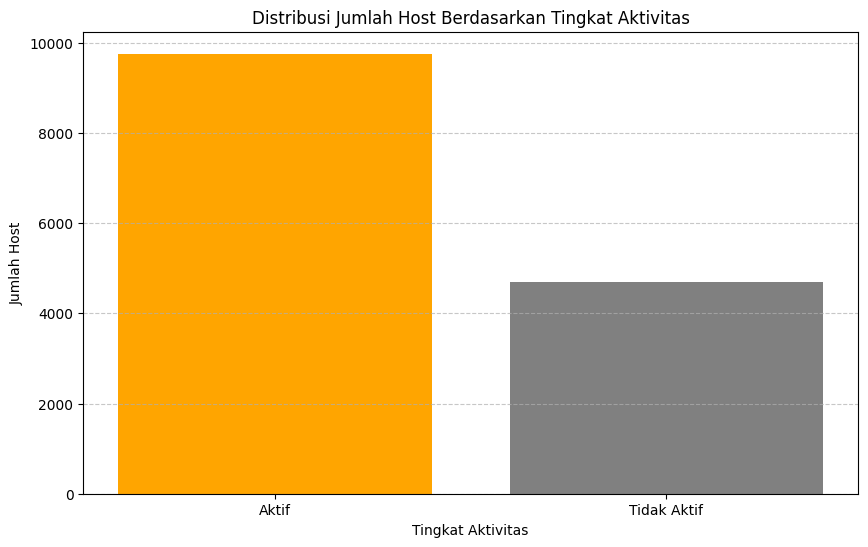

In [88]:
# Menghitung jumlah host berdasarkan tingkat aktivitas
activity_counts = df['activity_level'].value_counts()

# Visualisasi barplot untuk jumlah host berdasarkan tingkat aktivitas
plt.figure(figsize=(10, 6))
plt.bar(activity_counts.index, activity_counts.values, color=['orange', 'gray'])
plt.title('Distribusi Jumlah Host Berdasarkan Tingkat Aktivitas')
plt.xlabel('Tingkat Aktivitas')
plt.ylabel('Jumlah Host')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan visualisasi
plt.show()


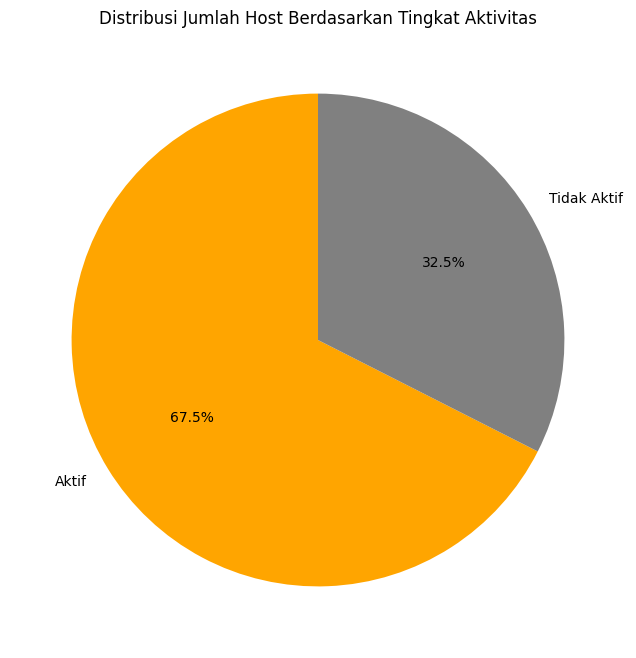

In [89]:
# Menghitung jumlah host berdasarkan tingkat aktivitas untuk visualisasi pie chart
activity_counts = df['activity_level'].value_counts()

# Visualisasi pie chart untuk jumlah host berdasarkan tingkat aktivitas
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'gray'])
plt.title('Distribusi Jumlah Host Berdasarkan Tingkat Aktivitas')
plt.show()


Setelah membagi host menjadi dua kategori berdasarkan tingkat aktivitas mereka, hasilnya adalah sebagai berikut:
- Host Aktif: 9.758 host
- Host Tidak Aktif: 4.692 host

Mari kita lihat apakah ada relasi dari host aktif dan tidak aktif dengan indikator lain.

### dari distribusi ketersediaan berdasarkan Tingkat Aktivitas.

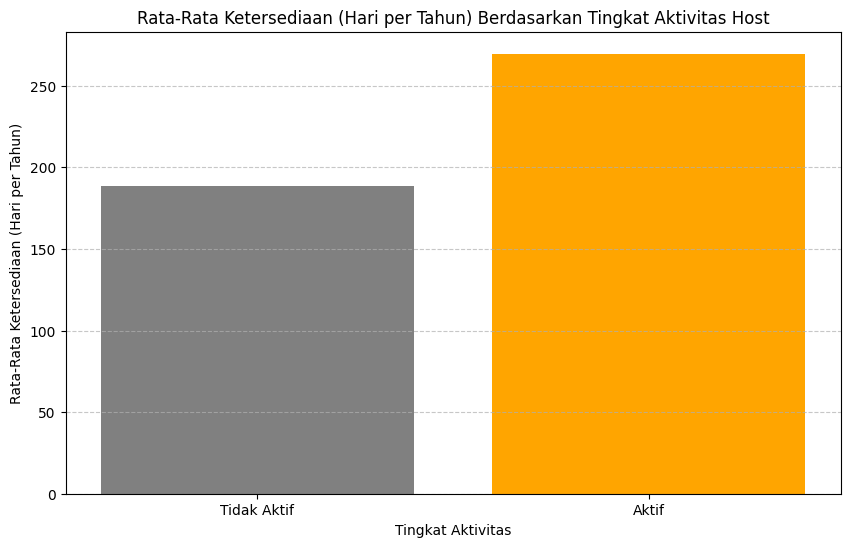

In [ ]:
# Menghitung rata-rata ketersediaan (hari per tahun) berdasarkan tingkat aktivitas
mean_availability_by_activity = df.groupby('activity_level')['availability_365'].mean()

# Visualisasi barplot untuk rata-rata ketersediaan (hari per tahun) berdasarkan tingkat aktivitas
plt.figure(figsize=(10, 6))
plt.bar(mean_availability_by_activity.index, mean_availability_by_activity.values, color=['gray', 'orange'])
plt.title('Rata-Rata Ketersediaan (Hari per Tahun) Berdasarkan Tingkat Aktivitas Host')
plt.xlabel('Tingkat Aktivitas')
plt.ylabel('Rata-Rata Ketersediaan (Hari per Tahun)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan visualisasi
plt.show()

Dari visualisasi distribusi ketersediaan, host yang aktif menunjukkan ketersediaan yang lebih tinggi dibandingkan host yang tidak aktif. Host aktif cenderung membuka listing mereka lebih banyak hari dalam setahun, yang mengindikasikan komitmen mereka untuk melayani tamu secara konsisten.

### Rata-Rata Ulasan per Bulan Berdasarkan Tingkat Aktivitas

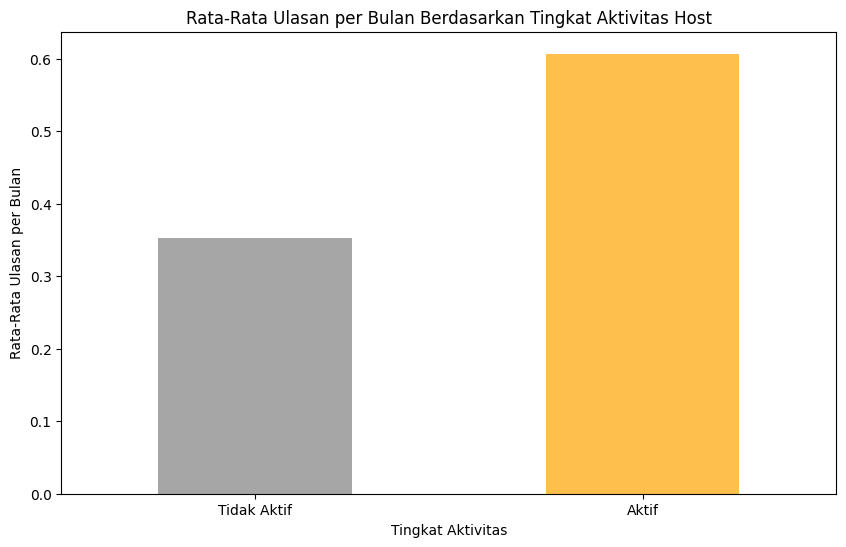

In [91]:
# Bar Plot 2: Mean reviews per month by activity level
plt.figure(figsize=(10, 6))
df.groupby('activity_level')['reviews_per_month'].mean().plot(kind='bar', color=['gray', 'orange'], alpha=0.7)
plt.title('Rata-Rata Ulasan per Bulan Berdasarkan Tingkat Aktivitas Host')
plt.xlabel('Tingkat Aktivitas')
plt.ylabel('Rata-Rata Ulasan per Bulan')
plt.xticks(rotation=0)
plt.show()

Rata-rata ulasan per bulan lebih tinggi pada host aktif. Hal ini menunjukkan bahwa host aktif cenderung memiliki lebih banyak tamu secara berkala, sehingga lebih sering mendapatkan ulasan baru. Ini bisa menjadi indikator keterlibatan host yang lebih tinggi dalam platform.

### Distribusi Harga per Malam Berdasarkan Tingkat Aktivitas

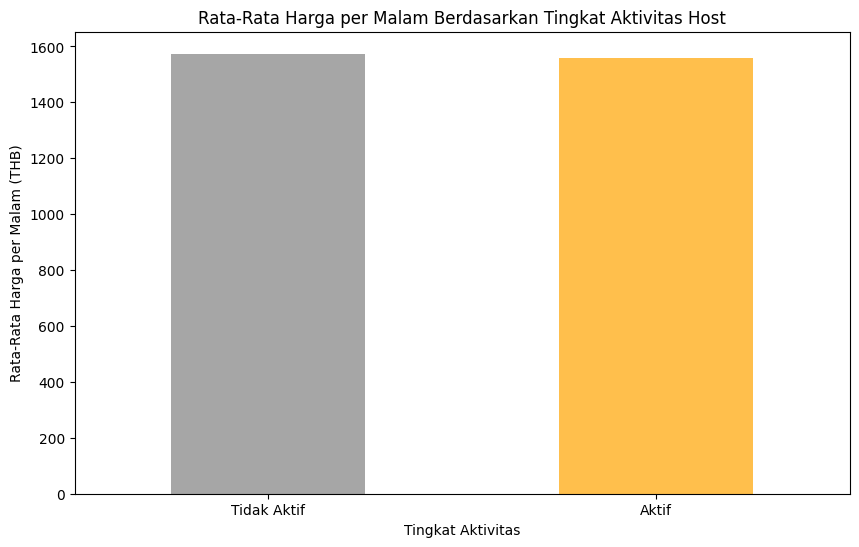

In [92]:
# Bar Plot 3: Mean price per night by activity level
plt.figure(figsize=(10, 6))
df.groupby('activity_level')['price'].mean().plot(kind='bar', color=['gray', 'orange'], alpha=0.7)
plt.title('Rata-Rata Harga per Malam Berdasarkan Tingkat Aktivitas Host')
plt.xlabel('Tingkat Aktivitas')
plt.ylabel('Rata-Rata Harga per Malam (THB)')
plt.xticks(rotation=0)
plt.show()

Harga rata-rata per malam relatif serupa untuk host aktif dan tidak aktif, sehingga harga bukanlah faktor pembeda utama dalam aktivitas host.

### Rata-Rata Jumlah Listing per Host Berdasarkan Tingkat Aktivitas

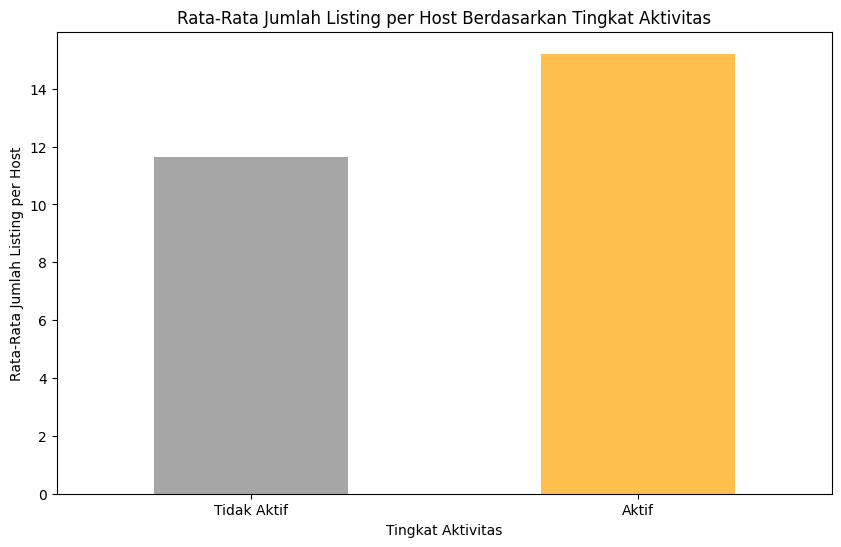

In [93]:
# Bar Plot 4: Mean number of listings per host by activity level
plt.figure(figsize=(10, 6))
df.groupby('activity_level')['calculated_host_listings_count'].mean().plot(kind='bar', color=['gray', 'orange'], alpha=0.7)
plt.title('Rata-Rata Jumlah Listing per Host Berdasarkan Tingkat Aktivitas')
plt.xlabel('Tingkat Aktivitas')
plt.ylabel('Rata-Rata Jumlah Listing per Host')
plt.xticks(rotation=0)
plt.show()

Rata-rata jumlah listing per host lebih tinggi di antara host aktif. Ini mengindikasikan bahwa host yang aktif tidak hanya fokus pada satu listing, tetapi juga memiliki beberapa listing yang dikelola secara bersamaan, sehingga mereka lebih berkomitmen dan memiliki potensi lebih besar untuk berkontribusi pada pertumbuhan platform.

### Tren Aktivitas Berdasarkan Lokasi
Menganalisis tingkat aktivitas host berdasarkan lokasi listing dapat memberikan informasi tentang area atau wilayah mana yang memiliki konsentrasi host aktif lebih tinggi.

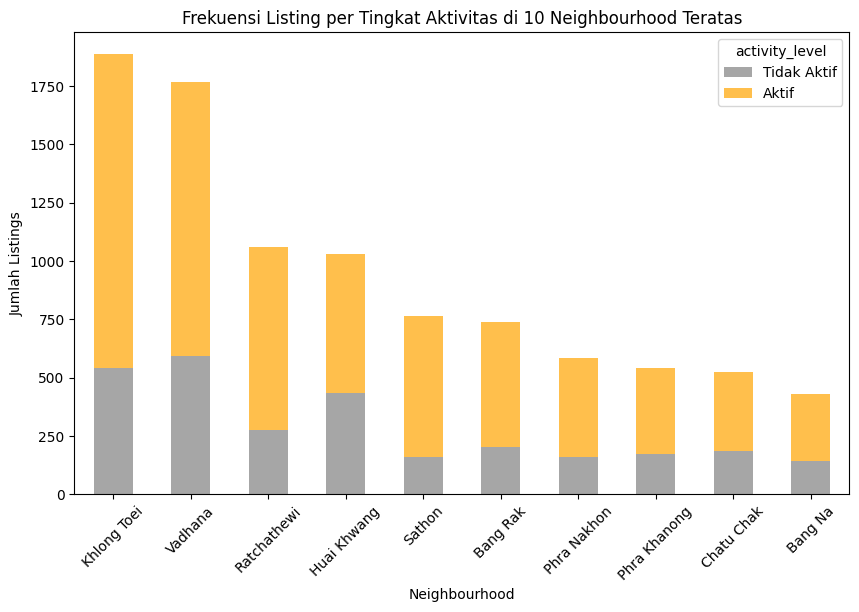

In [ ]:
crosstab_data = pd.crosstab(df['neighbourhood'], df['activity_level'])
top_10_neighbourhoods = crosstab_data.sum(axis=1).nlargest(10).index
crosstab_top_10 = crosstab_data.loc[top_10_neighbourhoods]
crosstab_top_10.plot(kind='bar', stacked=True, color=['gray', 'orange'], figsize=(10, 6), alpha=0.7)
plt.title('Frekuensi Listing per Tingkat Aktivitas di 10 Neighbourhood Teratas')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listings')
plt.xticks(rotation=45)
plt.show()

listings di Khlong Toei dan Vadhana adalah yang paling banyak di antara 10 neighbourhood teratas di Bangkok, dengan sebagian besar listings berstatus "Aktif". Ini menunjukkan bahwa kedua area ini sangat populer untuk penyewaan Airbnb, mungkin karena lokasinya yang menarik atau fasilitas yang mendukung aktivitas wisata. Sebaliknya, neighbourhood lain seperti Bang Na dan Chatuchak memiliki jumlah listings yang lebih rendah, meskipun masih didominasi oleh listings "Aktif". Secara keseluruhan, mayoritas listings di neighbourhood teratas aktif.

### Distribusi Berdasarkan Tipe Kamar
Mengamati perbedaan dalam tingkat aktivitas berdasarkan tipe kamar (seperti "Entire home/apt" vs "Private room").

In [95]:
# Analyzing the distribution of activity levels based on room types
room_type_activity_distribution = df.groupby(['room_type', 'activity_level']).size().unstack().fillna(0)

# Calculating the percentage of active hosts within each room type
room_type_activity_distribution['Active_Percentage'] = (
    room_type_activity_distribution['Aktif'] / 
    (room_type_activity_distribution['Aktif'] + room_type_activity_distribution['Tidak Aktif'])
) * 100

# Sorting by percentage of active hosts
room_type_activity_distribution_sorted = room_type_activity_distribution.sort_values(by='Active_Percentage', ascending=False)

# Display the distribution to the user
room_type_activity_distribution_sorted

activity_level,Tidak Aktif,Aktif,Active_Percentage
room_type,,,
Entire home/apt,2345,5762,71.074380
Hotel room,181,372,67.269439
Shared room,190,319,62.671906
Private room,1976,3305,62.582844


Distribusi tingkat aktivitas host menunjukkan bahwa kategori "Entire home/apt" memiliki persentase host aktif tertinggi (71,07%), menunjukkan komitmen lebih dari host dalam mengelola seluruh properti, mungkin karena potensi pendapatan yang lebih besar. Kategori "Hotel room" juga memiliki persentase aktivitas yang cukup tinggi (67,27%), mencerminkan standar layanan yang terstruktur. Sementara itu, tipe "Shared room" dan "Private room" memiliki tingkat aktivitas yang relatif lebih rendah (sekitar 62%), mungkin karena keterbatasan sumber daya dan fleksibilitas. Temuan ini menunjukkan bahwa Airbnb dapat menerapkan strategi berbeda untuk meningkatkan aktivitas host sesuai dengan tipe kamar yang dikelola.

## Kesimpulan dan Rekomendasi

#### Kesimpulan
Berdasarkan analisis visualisasi data tingkat aktivitas host Airbnb, kita dapat menarik beberapa kesimpulan terkait karakteristik host yang aktif dan kurang aktif di platform:

- Dari total data host yang ada, terdapat 9.758 host aktif dan 4.692 host tidak aktif. Host yang aktif menunjukkan ketersediaan listing yang lebih tinggi, membuka listing mereka lebih banyak hari dalam setahun.
- Host aktif juga memiliki rata-rata ulasan per bulan yang lebih tinggi, menandakan keterlibatan yang lebih baik dengan tamu dan kualitas layanan yang lebih baik.
- Harga per malam antara host aktif dan tidak aktif cukup kompetitif, tetapi host aktif cenderung memiliki kualitas layanan yang lebih konsisten untuk mempertahankan harga tersebut.
- Host aktif memiliki rata-rata jumlah listing per host yang lebih tinggi, yang mengindikasikan komitmen dan manajemen multi-listing yang lebih baik.
Wilayah dengan konsentrasi host aktif yang lebih tinggi cenderung berada di daerah wisata atau bisnis populer, seperti Pom Prap Sattru Phai dan Sathon.
- Dari segi tipe kamar, kategori "Entire home/apt" menunjukkan persentase host aktif tertinggi (71,07%), menunjukkan adanya komitmen lebih besar dalam mengelola properti penuh.

#### Rekomendasi

- Fokus Pengembangan dan Dukungan di Wilayah Populer
Airbnb perlu mempertimbangkan untuk memberikan pelatihan atau dukungan tambahan kepada host di wilayah dengan daya tarik wisata atau bisnis yang tinggi, karena wilayah ini memiliki potensi besar untuk mendukung pertumbuhan platform. Wilayah seperti Pom Prap Sattru Phai dan Sathon dapat dijadikan target utama.

- Perkuat Dukungan untuk Host dengan Tipe Properti Penuh (Entire Home/Apartment)
Mengingat komitmen tinggi dari host yang mengelola properti penuh, Airbnb bisa menawarkan program khusus, seperti pelatihan manajemen properti atau strategi pemasaran, untuk mendorong kualitas listing lebih baik.

- Optimalkan Listing Multi-Host
Host yang mengelola beberapa listing menunjukkan keterlibatan dan komitmen lebih tinggi. Airbnb dapat mengembangkan program kemitraan dengan host multi-listing untuk memberikan insentif atau akses eksklusif ke fitur premium.

- Tingkatkan Keterlibatan Host Melalui Ulasan dan Ketersediaan
Mengingat hubungan antara ketersediaan listing dan jumlah ulasan yang lebih tinggi dengan aktivitas host, Airbnb dapat mendorong host untuk lebih konsisten dalam menjaga ketersediaan dan merespons ulasan tamu secara aktif melalui panduan atau reminder otomatis.

- Dengan rekomendasi ini, diharapkan Airbnb dapat lebih efisien dalam alokasi sumber daya, meningkatkan kualitas listing, dan memperkuat keterlibatan host aktif di platform.